**Step 1: Centralized training with Pytorch**

---



In [3]:
%%capture
%run '/content/drive/MyDrive/Federated_Learning/MNIST/IID/MNIST_IID_Requirement.ipynb'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def train(net, trainloader):
    """Train the network on the training set."""
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters())
    net.train()
    correct, total, train_loss = 0, 0, 0.0
    for batch in trainloader:
      images, labels = batch["image"].to(DEVICE), batch["label"].to(DEVICE)
      optimizer.zero_grad() # Clear the gradients of all optimized tensors
      outputs = net(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step() # Update model parameters

      train_loss += loss.item()
      total += labels.size(0)
      correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()
    train_loss /= len(trainloader.dataset)
    train_acc = correct / total
    return train_loss, train_acc

In [5]:
def test(net, testloader):
    """Evaluate the network on the entire test set."""
    criterion = torch.nn.CrossEntropyLoss()
    correct, total, loss = 0, 0, 0.0
    net.eval()
    # disable gradient computation during evaluation
    with torch.no_grad():
        for batch in testloader:
            images, labels = batch["image"].to(DEVICE), batch["label"].to(DEVICE)
            outputs = net(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    loss /= len(testloader.dataset)
    accuracy = correct / total
    return loss, accuracy

Train the model

In [6]:
trainloader, valloader, testloader = load_datasets(partition_id=0)
net = Net().to(DEVICE)

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(20):
    train_loss, train_acc = train(net, trainloader)
    val_loss, val_acc = test(net, valloader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss {train_loss:.4f}, Train Acc {train_acc:.4f} | Val Loss {val_loss:.4f}, Val Acc {val_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Epoch 1: Train Loss 0.0252, Train Acc 0.7277 | Val Loss 0.0058, Val Acc 0.9442
Epoch 2: Train Loss 0.0067, Train Acc 0.9356 | Val Loss 0.0053, Val Acc 0.9525
Epoch 3: Train Loss 0.0052, Train Acc 0.9487 | Val Loss 0.0029, Val Acc 0.9767
Epoch 4: Train Loss 0.0038, Train Acc 0.9604 | Val Loss 0.0030, Val Acc 0.9675
Epoch 5: Train Loss 0.0032, Train Acc 0.9681 | Val Loss 0.0022, Val Acc 0.9742
Epoch 6: Train Loss 0.0026, Train Acc 0.9729 | Val Loss 0.0021, Val Acc 0.9808
Epoch 7: Train Loss 0.0026, Train Acc 0.9750 | Val Loss 0.0033, Val Acc 0.9683
Epoch 8: Train Loss 0.0025, Train Acc 0.9742 | Val Loss 0.0026, Val Acc 0.9783
Epoch 9: Train Loss 0.0022, Train Acc 0.9790 | Val Loss 0.0026, Val Acc 0.9800
Epoch 10: Train Loss 0.0022, Train Acc 0.9806 | Val Loss 0.0019, Val Acc 0.9883
Epoch 11: Train Loss 0.0016, Train Acc 0.9850 | Val Loss 0.0024, Val Acc 0.9825
Epoch 12: Train Loss 0.0026, Train Acc 0.9785 | Val Loss 0.0028, Val Acc 0.9867
Epoch 13: Train Loss 0.0018, Train Acc 0.9846 | V

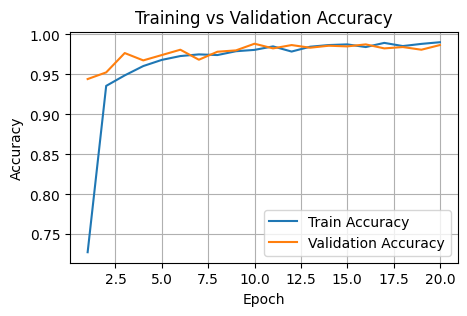

In [7]:
plt.figure(figsize=(5,3))
plt.plot(range(1, 21), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
loss, accuracy = test(net, testloader)
print(f"Final test set performance:\nloss {loss}\naccuracy {accuracy}")

Final test set performance:
loss 0.0036729369616671534
accuracy 0.9835
